In [140]:
from datetime import datetime
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data prep

Import

In [127]:
df = pd.read_csv("PROJECT_training2005/ufz_qc_challenge/00_data.csv", sep=" ")
df.head()

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
1.2,2012-07-19,17:45:53,1,2012-07-19 17:45:53,-2.8240,Auto:Range,18.2580,OK,-5.9817,Auto:Range,18.2232,...,Auto:Range,18.3623,OK,3599,0.05,0.05,0.05,0.05,0.05,0.05
2.2,2010-10-03,02:07:00,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7372,OK,3138,0.10,0.20,0.30,0.40,0.50,0.60
2.3,2010-10-03,03:07:00,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,...,Auto:Spike,6.8154,OK,3496,0.10,0.20,0.30,0.40,0.50,0.60
2.4,2010-10-06,05:08:00,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,-4.7984,Auto:Range,-15.1656,...,OK,5.7024,OK,3198,0.10,0.20,0.30,0.40,0.50,0.60
2.5,2010-10-10,04:09:00,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7720,OK,3209,0.10,0.20,0.30,0.40,0.50,0.60


# Descriptives

In [101]:
df.columns

Index(['Time', 'Box', 'Date.Time', 'SM1', 'SM1_Flag', 'Temp1', 'Temp1_Flag',
       'SM2', 'SM2_Flag', 'Temp2', 'Temp2_Flag', 'SM3', 'SM3_Flag', 'Temp3',
       'Temp3_Flag', 'SM4', 'SM4_Flag', 'Temp4', 'Temp4_Flag', 'SM5',
       'SM5_Flag', 'Temp5', 'Temp5_Flag', 'SM6', 'SM6_Flag', 'Temp6',
       'Temp6_Flag', 'BattV', 'SM1_Depth', 'SM2_Depth', 'SM3_Depth',
       'SM4_Depth', 'SM5_Depth', 'SM6_Depth'],
      dtype='object')

In [108]:
df.shape

(6643366, 34)

In [137]:
df.dtypes

Time           object
Box             int64
Date.Time      object
SM1           float64
SM1_Flag       object
Temp1         float64
Temp1_Flag     object
SM2           float64
SM2_Flag       object
Temp2         float64
Temp2_Flag     object
SM3           float64
SM3_Flag       object
Temp3         float64
Temp3_Flag     object
SM4           float64
SM4_Flag       object
Temp4         float64
Temp4_Flag     object
SM5           float64
SM5_Flag       object
Temp5         float64
Temp5_Flag     object
SM6           float64
SM6_Flag       object
Temp6         float64
Temp6_Flag     object
BattV           int64
SM1_Depth     float64
SM2_Depth     float64
SM3_Depth     float64
SM4_Depth     float64
SM5_Depth     float64
SM6_Depth     float64
dtype: object

In [138]:
mydf = df["Date.Time"]
mydf.head()

1.2  2012-07-19    2012-07-19 17:45:53
2.2  2010-10-03    2010-10-03 02:07:00
2.3  2010-10-03    2010-10-03 03:07:00
2.4  2010-10-06    2010-10-06 05:08:00
2.5  2010-10-10    2010-10-10 04:09:00
Name: Date.Time, dtype: object

In [142]:
type()

pandas.core.series.Series

In [173]:
# test = datetime.strptime(df["Date.Time"], '%Y-%m-%d %H:%M:%S')

TypeError: strptime() argument 1 must be str, not Series

In [130]:
df[["Date.Time", "Box", "SM1", "SM2", "SM3", "SM4", "SM5", "SM6", "BattV"]].groupby(['Box']).mean()

,SM1,SM2,SM3,SM4,SM5,SM6,BattV
Box,,,,,,,
1,-2.824000,-5.981700,-6.476500,-4.578800,-9.587500,-8.584000,3599.000000
2,23.804532,21.011951,17.592367,18.790368,17.822814,22.649545,3390.135117
3,13.978607,70.130481,3.434131,20.356951,18.828403,20.321050,3295.031696
4,-3.201543,23.936011,28.161384,17.556279,57.092807,26.298317,3318.410948
5,22.797627,27.294798,25.928289,18.285917,23.102944,25.330090,3467.283452
6,19.573737,82.351384,17.710233,2.657540,17.008131,24.595171,3371.432262
7,12.866035,17.738936,14.513814,33.493449,21.780431,9.404225,3346.819942
8,15.780277,33.469939,16.686320,52.587197,32.900818,26.979642,3466.374055
9,23.598313,149.519904,35.513384,38.777024,18.670082,27.320144,3374.372984


## Missing values

# Visualize

Lifetime of a Box

(0, 100)

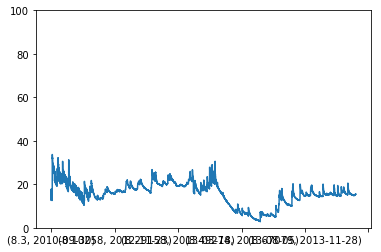

In [168]:
mydf = df[(df["Box"]==8)]
y = mydf["SM1"]
# plt.plot(mydf["Date.Time"], mydf["SM1"])
# plt.show()

ax = pd.Series(y).plot()
ax.set_ylim(0, 100)

(0, 100)

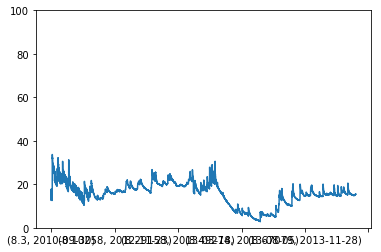

In [182]:
mydf = df[(df["Box"]==8)]
y1 = pd.Series(mydf["SM1"])
# plt.plot(mydf["Date.Time"], mydf["SM1"])
# plt.show()

ax = y1.plot()
ax.set_ylim(0, 100)

/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/matplotlib-3.0.3-py3.6-linux-x86_64.egg/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/matplotlib-3.0.3-py3.6-linux-x86_64.egg/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/matplotlib-3.0.3-py3.6-linux-x86_64.egg/matplotlib

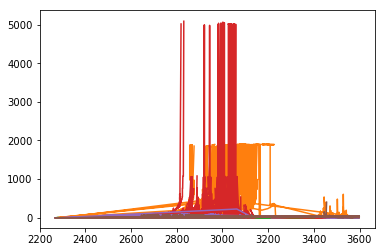

In [215]:
mydf = df[["Box", "SM1", "SM2", "SM3", "SM4", "SM5", "SM6", "BattV"]]
mydf = df[(df["Box"]==3)]
Columns = ["SM1", "SM2", "SM3", "SM4", "SM5", "SM6"]
x = mydf["BattV"]

for i in range(0, 6):
    y = mydf[Columns[i]]
    plt.plot(x, y)
# plt.axis([0, 3600, -10, 100])
plt.show()

Box 3 with Histogram of SM's

/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/numpy-1.17.5-py3.6-linux-x86_64.egg/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/numpy-1.17.5-py3.6-linux-x86_64.egg/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.0270e+03, 6.2440e+03, 7.5960e+03, 1.8963e+04, 4.3851e+04,
        2.8361e+04, 4.8100e+02, 1.6000e+01, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 1.5000e+01, 9.4000e+01, 3.7200e+02,
        2.6000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 13

/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/matplotlib-3.0.3-py3.6-linux-x86_64.egg/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


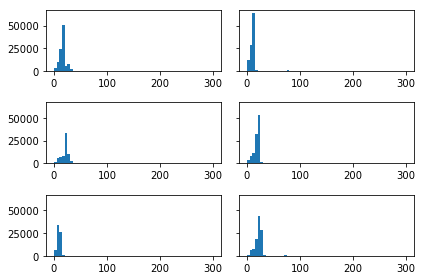

In [228]:
n_bins = 60
myrange = [0, 300]
mydf = df[(df["Box"]==3)]
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True)

axs[0, 0].hist(mydf["SM"+str(1)], bins=n_bins, range=myrange)
axs[1, 0].hist(mydf["SM"+str(2)], bins=n_bins, range=myrange)
axs[2, 0].hist(mydf["SM"+str(3)], bins=n_bins, range=myrange)
axs[0, 1].hist(mydf["SM"+str(4)], bins=n_bins, range=myrange)
axs[1, 1].hist(mydf["SM"+str(5)], bins=n_bins, range=myrange)
axs[2, 1].hist(mydf["SM"+str(6)], bins=n_bins, range=myrange)

/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/numpy-1.17.5-py3.6-linux-x86_64.egg/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/numpy-1.17.5-py3.6-linux-x86_64.egg/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


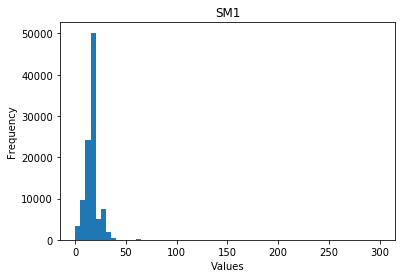

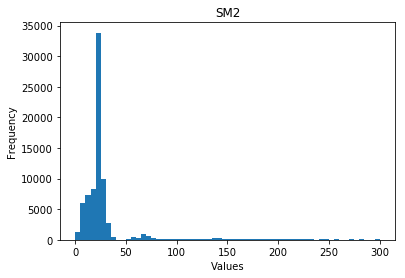

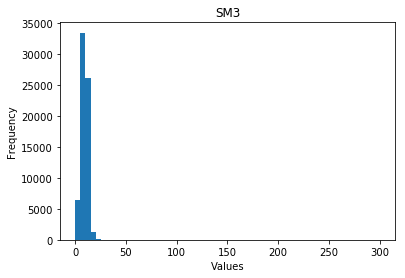

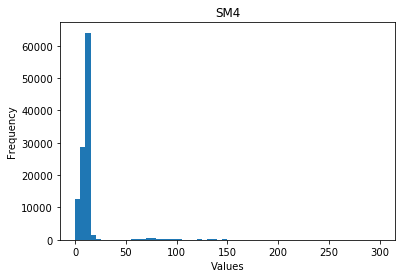

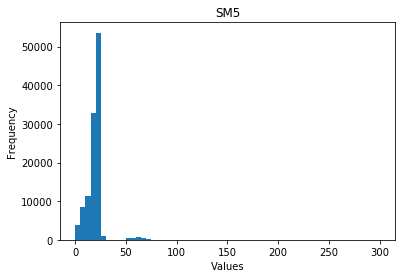

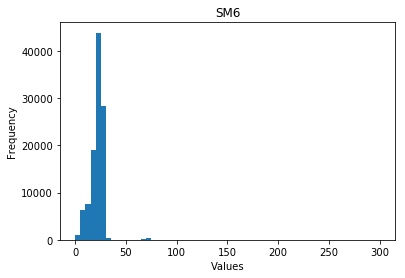

In [231]:
mydf = df[(df["Box"]==3)]
Columns = ["SM1", "SM2", "SM3", "SM4", "SM5", "SM6"]

n_bins = 60

for i in range(0,6):
    plt.hist(mydf[Columns[i]],  bins=n_bins, range=[0, 300])
    plt.title(Columns[i])
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()